In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('salexpdata.csv')

data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


In [3]:
X_label, Y_label = data.columns[1], data.columns[0]

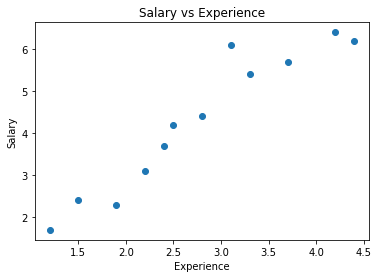

In [4]:
plt.scatter(data[X_label], data[Y_label])
plt.xlabel(X_label.capitalize())
plt.ylabel(Y_label.capitalize())
plt.title('Salary vs Experience')
plt.show()

In [5]:
X = data[X_label].values
Y = data[Y_label].values

In [6]:
alpha = 0.01
epochs = 5
n = len(X)

a = 0.0
b = 0.0

errors = []
betas = []

for epoch in range(epochs):
    for x, y in zip(X, Y):
        y_pred = b * x + a
        mse = (y - y_pred) ** 2
        
        betas.append(b)
        errors.append(mse)
        
        delta_b = - 2 * alpha * (y - y_pred) * x
        delta_a = - 2 * alpha * (y - y_pred)
        
        b = b - delta_b
        a = a - delta_a
        
    
    alpha = alpha / 1.25

In [7]:
print(f'Linear Regression Line: {a} + {b} * X')

Linear Regression Line: 0.5166146387166289 + 1.3852430871265173 * X


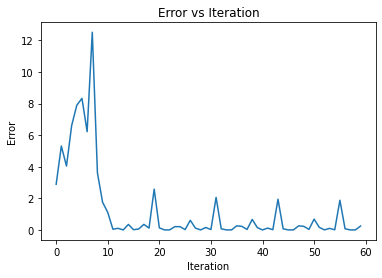

In [8]:
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()

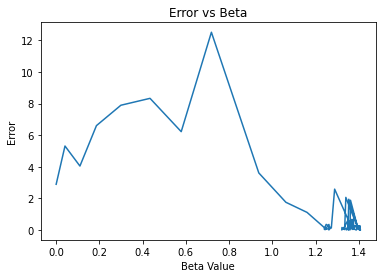

In [9]:
plt.plot(betas, errors)
plt.xlabel('Beta Value')
plt.ylabel('Error')
plt.title('Error vs Beta')
plt.show()

In [10]:
X_test = np.linspace(X.min()-0.5, X.max()+0.5, 100)
Y_test = b * X_test + a

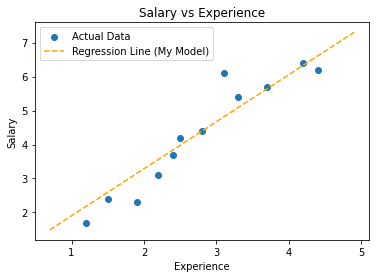

In [11]:
plt.scatter(X, Y, label='Actual Data')
plt.plot(X_test, Y_test, '--', color='orange', label='Regression Line (My Model)')
plt.xlabel(X_label.capitalize())
plt.ylabel(Y_label.capitalize())
plt.title('Salary vs Experience')
plt.legend()
plt.show()

In [12]:
from sklearn.linear_model import SGDRegressor

In [13]:
sgd_model = SGDRegressor(max_iter=60)

sgd_model.fit(X.reshape(-1, 1), Y)

SGDRegressor(max_iter=60)

In [14]:
print(f'Linear Regression Line: {sgd_model.intercept_[0]} + {sgd_model.coef_[0]} * X')

Linear Regression Line: 0.4233179167397127 + 1.4154271129710694 * X


In [15]:
Y_pred = sgd_model.predict(X_test.reshape(-1, 1))

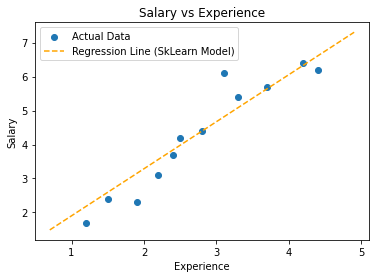

In [16]:
plt.scatter(X, Y, label='Actual Data')
plt.plot(X_test, Y_test, '--', color='orange', label='Regression Line (SkLearn Model)')
plt.xlabel(X_label.capitalize())
plt.ylabel(Y_label.capitalize())
plt.title('Salary vs Experience')
plt.legend()
plt.show()

In [17]:
def mean_squared_error(w, b):
    global X, Y
    
    Y_pred = w * X + b
    mse = np.sum((Y - Y_pred) ** 2) / len(X)
    
    return mse

In [23]:
W, B = np.meshgrid(np.linspace(0.5, 2, 1000), np.linspace(-0.5, 1, 1000))

np_mse = np.vectorize(mean_squared_error)
E = np_mse(W, B)

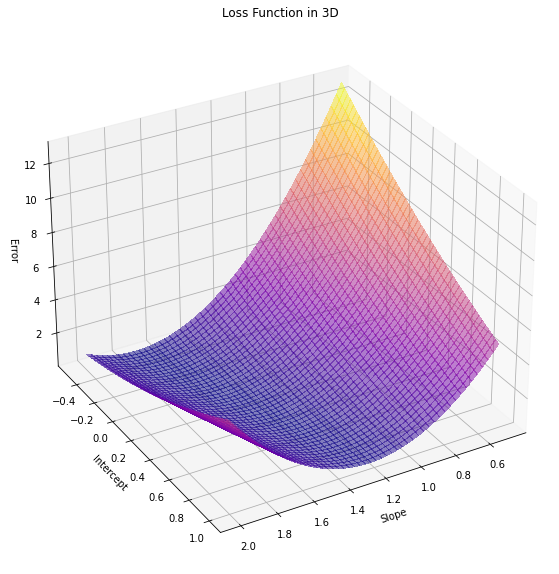

In [24]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, E, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)
ax.set_xlabel('Slope')
ax.set_ylabel('Intercept')
ax.set_zlabel('Error');
ax.set_title('Loss Function in 3D')
ax.view_init(30, 60)
plt.show()